# Downloading and preparing stock data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

start_date = '2010-01-01'
end_date = '2020-01-01'
ticker = 'INVE-B.ST'
df = yf.download(ticker,start_date,end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+01:00,33.375000,33.875000,33.375000,33.825001,23.078617,6739900
2010-01-05 00:00:00+01:00,33.875000,34.099998,33.775002,34.000000,23.198015,2981928
2010-01-07 00:00:00+01:00,33.724998,34.224998,33.674999,33.900002,23.129791,6745776
2010-01-08 00:00:00+01:00,34.049999,34.099998,33.750000,33.950001,23.163906,5780292
2010-01-11 00:00:00+01:00,34.125000,34.250000,33.900002,33.950001,23.163906,5140340
...,...,...,...,...,...,...
2019-12-19 00:00:00+01:00,128.750000,129.199997,128.149994,128.750000,121.449608,4504532
2019-12-20 00:00:00+01:00,128.750000,130.399994,128.500000,130.300003,122.911736,3953260
2019-12-23 00:00:00+01:00,130.300003,130.399994,129.550003,129.850006,122.487251,2428236


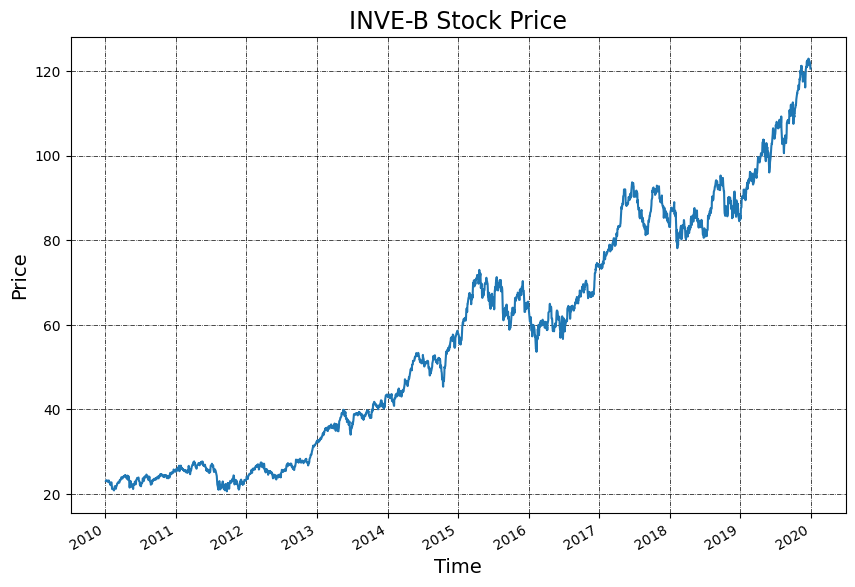

In [3]:
# Stock price plot

df['Adj Close'].plot(figsize=(10,7))
plt.title("INVE-B Stock Price",fontsize=17)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.grid(which="major", color='k',linestyle='-.',linewidth=0.5)

R2 score:  0.9959441417807768


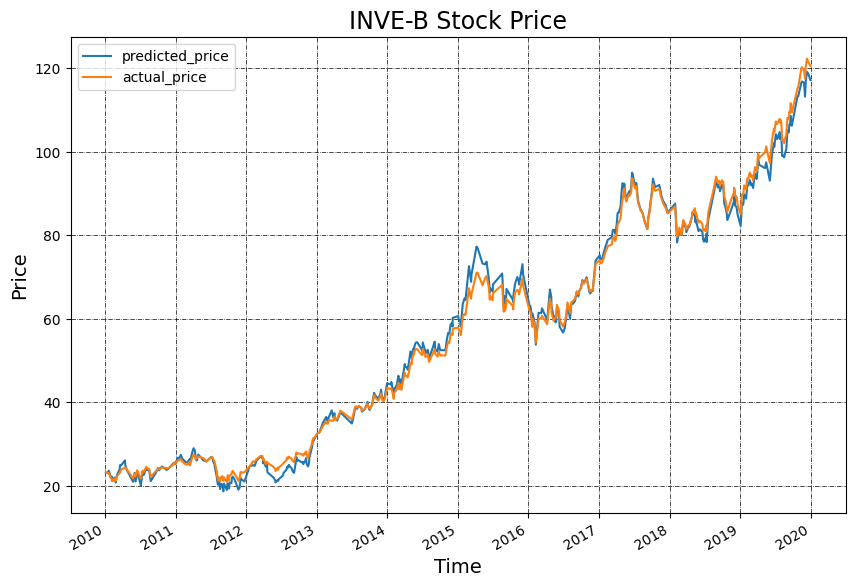

In [4]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model on the training data
reg = LinearRegression().fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = reg.predict(X_test)
predicted_price = pd.DataFrame(y_pred,index=y_test.index, columns= ['Price'])

predicted_price.plot(figsize=(10,7))
y_test.plot()
plt.title("INVE-B Stock Price",fontsize=17)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.grid(which="major", color='k',linestyle='-.',linewidth=0.5)
plt.legend(['predicted_price','actual_price'])

print("R2 score: ", reg.score(X_test, y_test))


In [22]:
future_dates = pd.date_range(start=df.index[-1], periods=3, freq='M')
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

# Concatenate the future data with the existing data
df = pd.concat([df, future_df])

# Fill in the future data with estimated values
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]

X = X.replace(np.nan,'',regex=True)
X

,Open,High,Low,Close,Volume
2010-01-04 00:00:00+01:00,33.375,33.875,33.375,33.825001,6739900
2010-01-05 00:00:00+01:00,33.875,34.099998,33.775002,34.0,2981928
2010-01-07 00:00:00+01:00,33.724998,34.224998,33.674999,33.900002,6745776
2010-01-08 00:00:00+01:00,34.049999,34.099998,33.75,33.950001,5780292
2010-01-11 00:00:00+01:00,34.125,34.25,33.900002,33.950001,5140340
...,...,...,...,...,...
2022-07-31 00:00:00+02:00,,,,,
2022-08-31 00:00:00+02:00,,,,,
2022-08-31 00:00:00+02:00,,,,,
2022-09-30 00:00:00+02:00,,,,,


In [23]:
future_pred = reg.predict(X[-3:])

# Store the predictions in the DataFrame
df.iloc[-3:, df.columns.get_loc('Adj Close')] = future_pred

# Print the predicted stock prices for the coming months
print("Predicted stock prices for the coming months: \n", df.iloc[-3:, df.columns.get_loc('Adj Close')])

ValueError: could not convert string to float: ''